<a href="https://colab.research.google.com/github/AdrianKopperud/automatedfeatureengineering/blob/main/EDA_Master_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pandas-profiling

#### Import library and functions

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', None)

sns.set()
%matplotlib inline

In [ ]:
def ploting_cnt_amt(DataFile, Column, lim=2000):
    total = len(new_df)
    tmp = pd.crosstab(DataFile[Column], DataFile['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{Column} Distributions ', fontsize=24)
    
    plt.subplot(211)
    plot_1 = sns.countplot(x=Column,data=DataFile,order=list(tmp[Column].values), palette='Blues')
    plot_1_2 = plot_1.twinx()
    plot_1_2 = sns.pointplot(x=Column, y='Fraud', data=tmp, order=list(tmp[Column].values),
                       color='gray', legend=False)
    plot_1_2.set_ylim(0,tmp['Fraud'].max()*1.1)
    plot_1_2.set_ylabel("%Fraud Transactions", fontsize=16)
    plot_1.set_title(f"Most Frequent {Column} values and % Fraud Transactions", fontsize=20)
    plot_1.set_xlabel(f"{Column} Category", fontsize=16)
    plot_1.set_ylabel("Count", fontsize=17)
    plot_1.set_xticklabels(plot_1.get_xticklabels(),rotation=45)
    sizes = []
    for p in plot_1.patches:
        height = p.get_height()
        sizes.append(height)
        plot_1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plot_1.set_ylim(0,max(sizes)*1.15)
    
    perc_amt = (DataFile.groupby(['isFraud',Column])['TransactionAmt'].sum() \
                / DataFile.groupby([Column])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = DataFile.groupby([Column])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    plot_2 = sns.barplot(x=Column, y='TransactionAmt', 
                       data=amt, palette='Blues',
                       order=list(tmp[Column].values))
    plot_2_2 = plot_2.twinx()
    plot_2_2 = sns.pointplot(x=Column, y='Fraud', data=perc_amt, 
                        order=list(tmp[Column].values),
                       color='gray', legend=False, )
    plot_2_2.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    plot_2_2.set_ylabel("%Fraud Total Amount", fontsize=16)
    plot_2.set_xticklabels(plot_2.get_xticklabels(),rotation=45)
    plot_2.set_title(f"{Column} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    plot_2.set_xlabel(f"{Column} Category ", fontsize=16)
    plot_2.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    plot_2.set_xticklabels(plot_2.get_xticklabels(),rotation=45)    
    
    for p in plot_2.patches:
        height = p.get_height()
        plot_2.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()

#### Import data

In [ ]:
# IMPORT DATA

# Google colab folder
from google.colab import drive
drive.mount('/content/drive')

# Load data 
id = pd.read_csv("/content/drive/MyDrive/Thesis/Data/ID.csv")
tran = pd.read_csv("/content/drive/MyDrive/Thesis/Data/Transaction.csv")

# Removal of VESTA engineered features
tran = tran.loc[:,~tran.columns.str.startswith('V')]

# Dataframe before cleaning
old_df = pd.merge(tran, id, how="outer", on=["TransactionID"])

# Dataframe after cleaning
new_df = pd.read_pickle('/content/drive/MyDrive/Thesis/Pickle/new_df.pkl')

del tran
del id


Mounted at /content/drive


Implement timeline for the plot

In [ ]:
# Isolate target variable
X = old_df.copy(deep=True)


train_length = 472432
test_length = 590540

train_X = X.iloc[:train_length]
test_X = X.iloc[train_length:test_length]

train_X = train_X.reset_index(drop=True)
test_X= test_X.reset_index(drop=True)

In [ ]:
# Engineer date and time variabels from timedelta
START_DATE = '2017-12-01'
startdate = dt.datetime.strptime(START_DATE, "%Y-%m-%d")
new_df["Transaction_Date"] = new_df['TransactionDT'].apply(lambda x: (startdate + dt.timedelta(seconds=x)))
new_df['Transaction_Weekdays'] = new_df['Transaction_Date'].dt.dayofweek
new_df['Transaction_Hours'] = new_df['Transaction_Date'].dt.hour
new_df['Transaction_Days'] = new_df['Transaction_Date'].dt.day
new_df['Transaction_Months'] = new_df['Transaction_Date'].dt.month

#### EDA

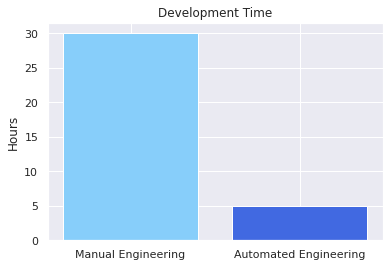

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create dataset
height = [30, 5]
bars = ('Manual Engineering', 'Automated Engineering')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = ['lightskyblue', 'royalblue'])
 
# Add title and axis names
plt.title('Development Time')
plt.ylabel('Hours')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

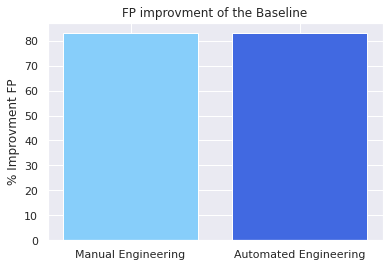

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create dataset
height = [83, 83]
bars = ('Manual Engineering', 'Automated Engineering')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = ['lightskyblue','royalblue'])
 
# Add title and axis names
plt.title('FP improvment of the Baseline')
plt.ylabel('% Improvment FP')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

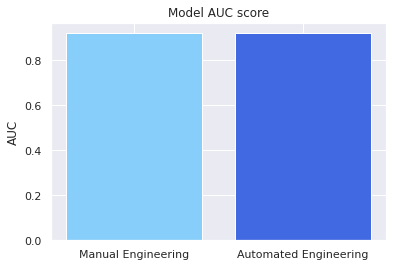

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create dataset
height = [0.92, 0.92]
bars = ('Manual Engineering', 'Automated Engineering')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = ['lightskyblue','royalblue'])
 
# Add title and axis names
plt.title('Model AUC score')
plt.ylabel('AUC')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

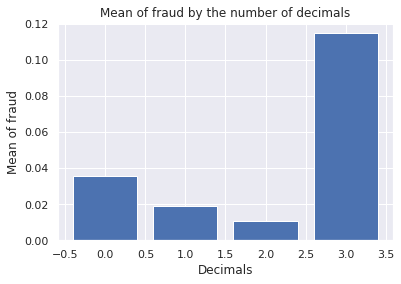

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

def change(hoge):
    num = 3
    hoge = int(hoge*1000)
    while(hoge % 10 ==0):
        num = num-1
        hoge = hoge /10
    if num<0:
        num = 0
    return num
  
  
old_df["decimal"] = old_df["TransactionAmt"].map(change)
 
# Create bars and choose color

plt.bar(old_df.groupby("decimal").mean()["isFraud"].index, old_df.groupby("decimal").mean()["isFraud"].values)
# Add title and axis names
plt.title('Mean of fraud by the number of decimals')
plt.xlabel('Decimals')
plt.ylabel('Mean of fraud')

 
# Show graph
plt.show()

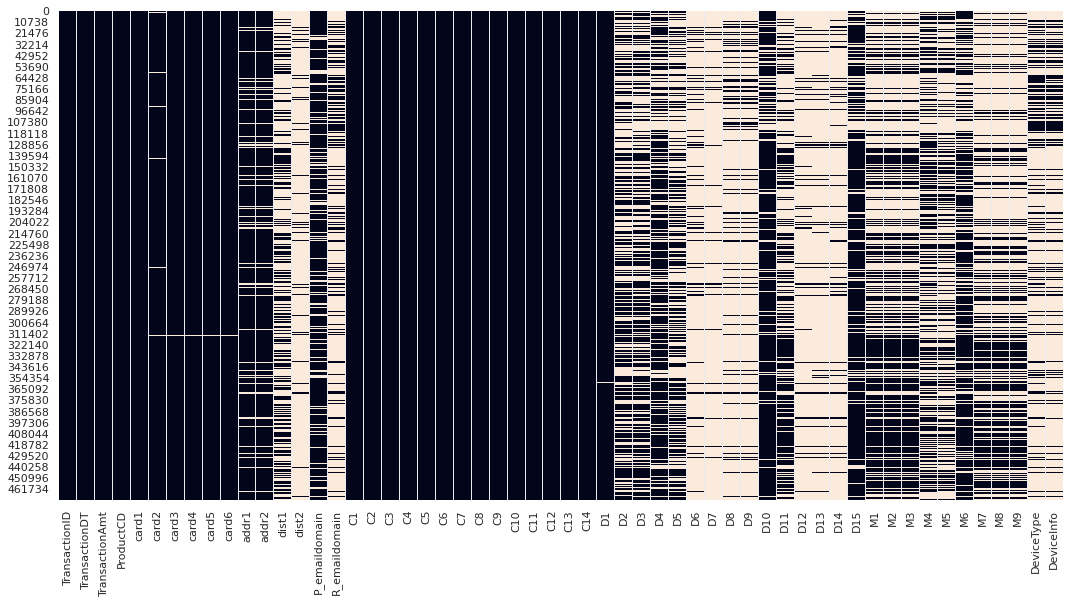

In [ ]:
train_full_Vesta = train_X.filter(regex='TransactionAmt|TransactionDT|card|ProductCD|addr|email|dist|P_emaildomain|R_emaildomain|C|D|M|DeviceType|DeviceInfo')
plt.figure(figsize=(18,9))
sns.heatmap(train_full_Vesta.isnull(), cbar= False)

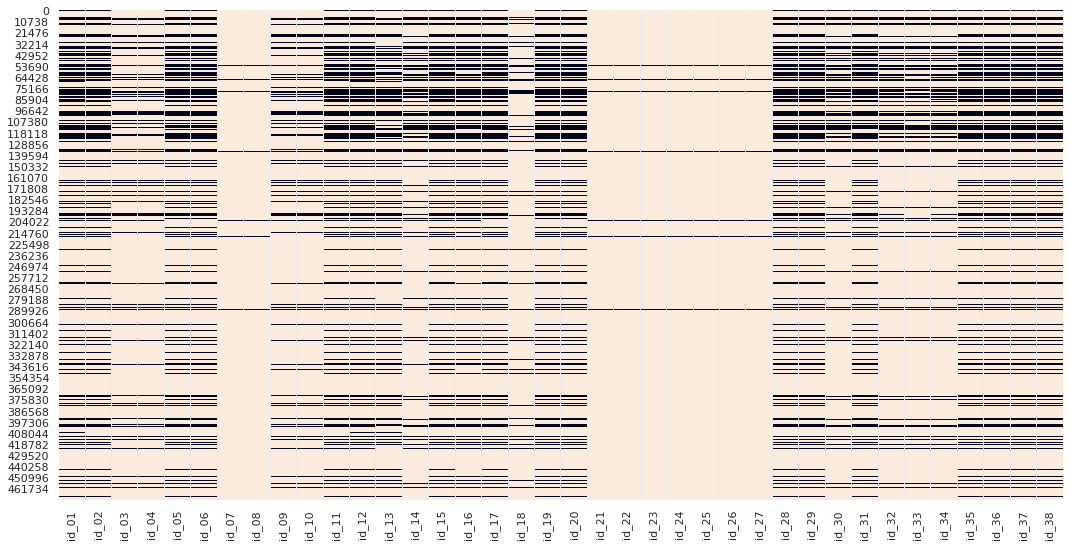

In [ ]:
train_full_Vesta = train_X.filter(regex='id')
plt.figure(figsize=(18,9))
sns.heatmap(train_full_Vesta.isnull(), cbar= False)

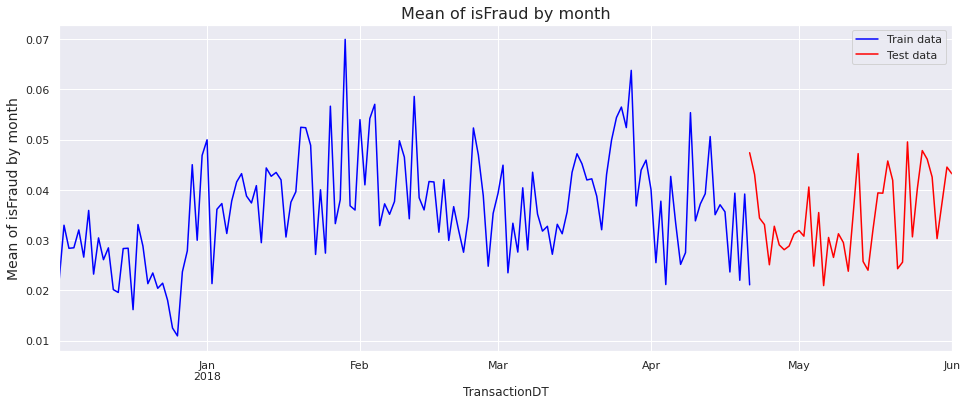

In [ ]:
# Plotting timeseries split for the research 
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
train_X.set_index('TransactionDT').resample('D').mean()['isFraud'].plot(ax=axes, color='blue').set_ylabel('isFraud MEAN', fontsize=14);
test_X.set_index('TransactionDT').resample('D').mean()['isFraud'].plot(ax=axes, color='red').set_ylabel('Mean of isFraud by month', fontsize=14);
axes.set_title('Mean of isFraud by month', fontsize=16);
axes.legend(['Train data', 'Test data'])

NameError: ignored

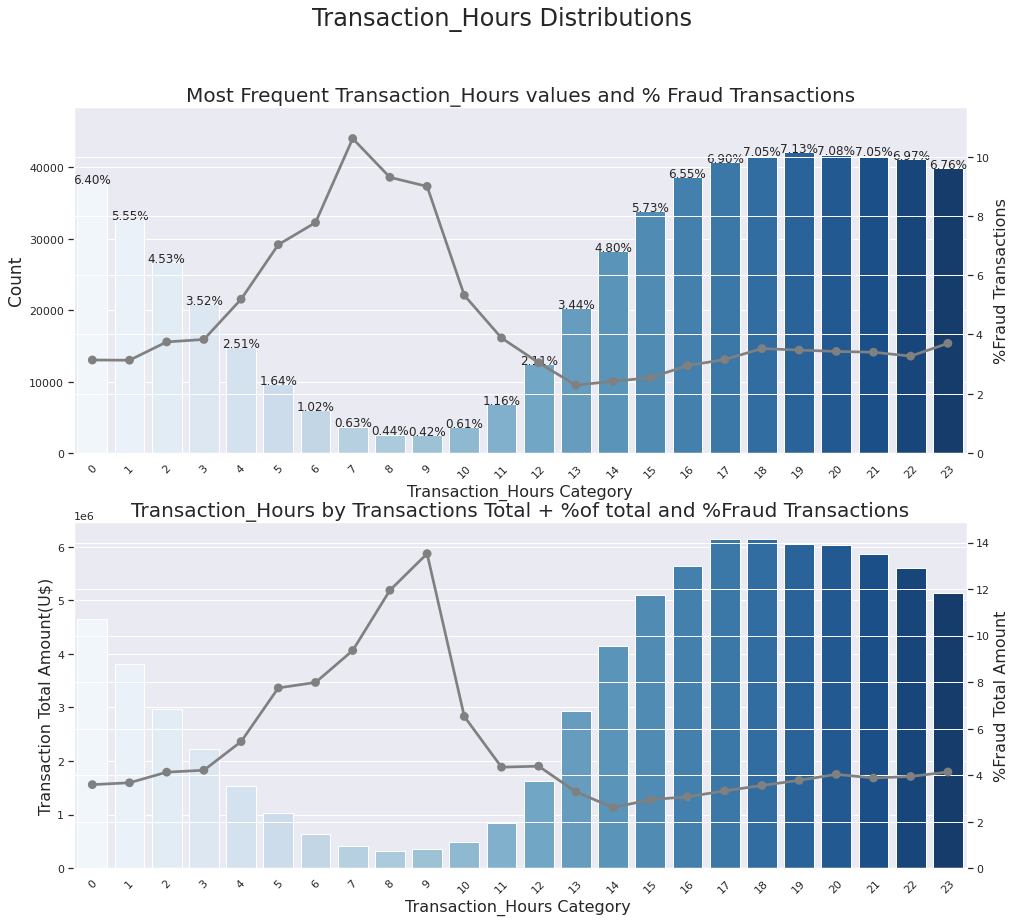

In [ ]:
# Plotting fraud by transaction hour
ploting_cnt_amt(new_df, 'Transaction_Hours')

In [ ]:
# Missing value ratio
data_null = old_df.isnull().sum()/len(old_df) * 100
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)[:500]
missing_data = pd.DataFrame({'Missing Ratio': data_null})
missing_data.head()

,Missing Ratio
id_24,99.196159
id_25,99.130965
id_08,99.127070
id_07,99.127070
id_21,99.126393


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Missing rate')

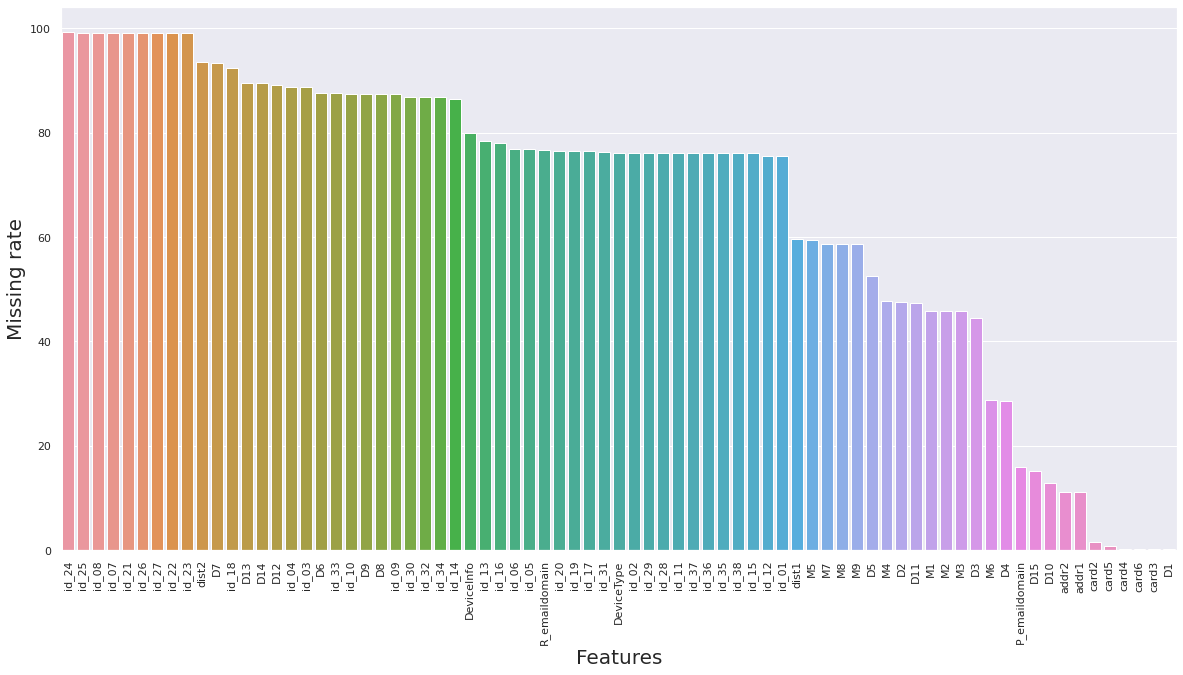

In [ ]:
# Missing value plot 
data_null = old_df.isnull().sum()/len(old_df) * 100
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)[:500]
missing_data = pd.DataFrame({'Missing Ratio': data_null})
missing_data.head()

# Set general font size
plt.rcParams.update({'font.size': 22})
plt.rcParams['font.size'] = '20'
plt.subplots(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(data_null.index, data_null)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Missing rate', fontsize=20)

In [ ]:
# OLD TO NEW - ID33
plotCategoryRateBar('id_33', 40), plotCategoryRateBar_2('screen_id_33')

Text(0.5, 0.98, 'Before and after mapping of id_33')

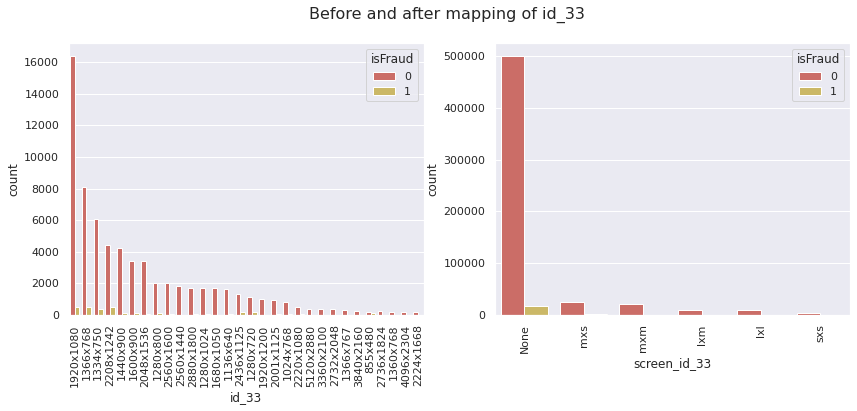

In [ ]:
# Mapping before and after for id_33
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='id_33', data=old_df, hue='isFraud', order=pd.value_counts(old_df['id_33']).iloc[:30].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='screen_id_33', data=new_df, hue='isFraud', order=pd.value_counts(new_df['screen_id_33']).iloc[:40].index, palette=custom, ax=axes[1])
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("Before and after mapping of id_33", size=16)

Text(0.5, 0.98, 'Before and after mapping of id_30')

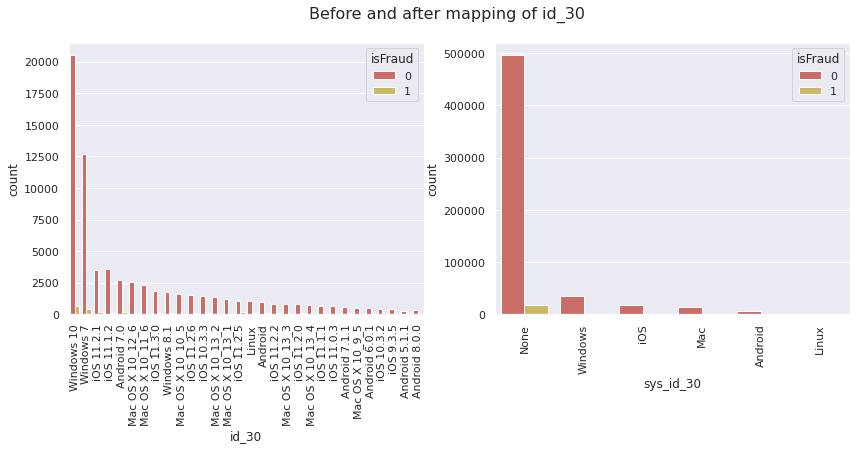

In [ ]:
# Mapping before and after for DeviceInfo
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='id_30', data=old_df, hue='isFraud', order=pd.value_counts(old_df['id_30']).iloc[:30].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='sys_id_30', data=new_df, hue='isFraud', order=pd.value_counts(new_df['sys_id_30']).iloc[:40].index, palette=custom, ax=axes[1])
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("Before and after mapping of id_30", size=16)

Text(0.5, 0.98, 'Before and after mapping of id_31')

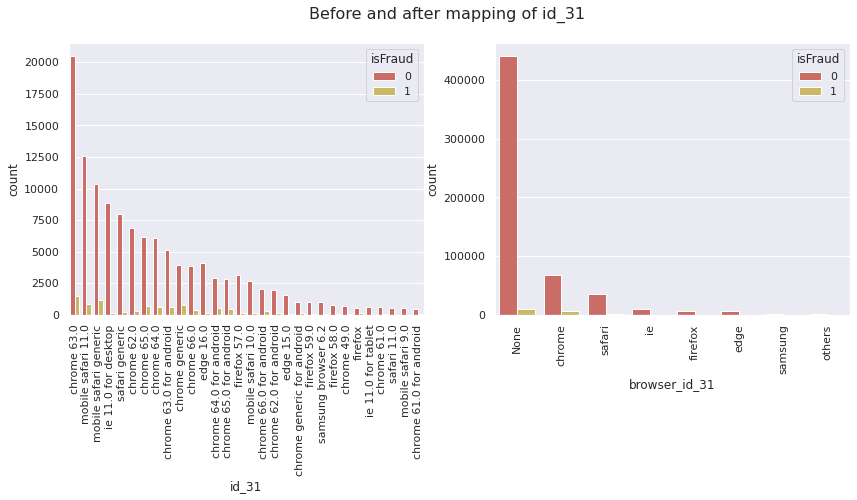

In [ ]:
# Mapping before and after for DeviceInfo
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='id_31', data=old_df, hue='isFraud', order=pd.value_counts(old_df['id_31']).iloc[:30].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='browser_id_31', data=new_df, hue='isFraud', order=pd.value_counts(new_df['browser_id_31']).iloc[:40].index, palette=custom, ax=axes[1])
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("Before and after mapping of id_31", size=16)

Text(0.5, 0.98, 'Before and after mapping of DeviceInfo')

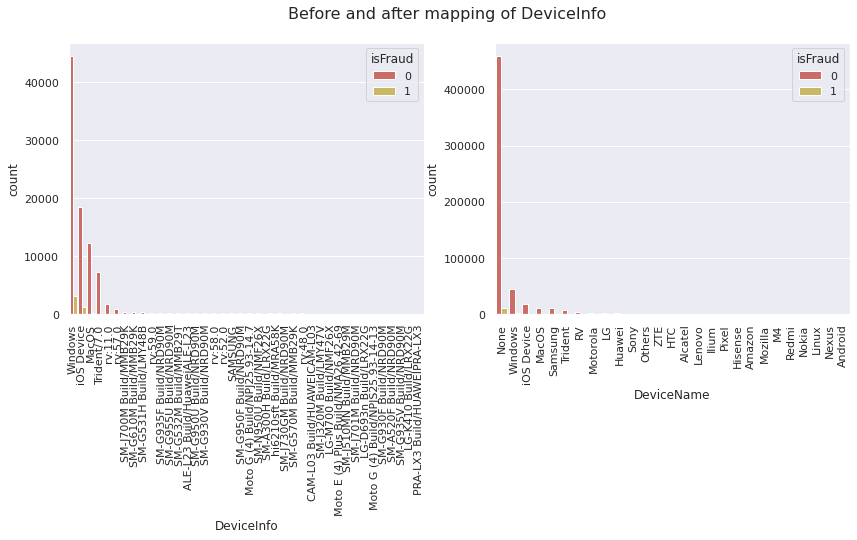

In [ ]:
# Mapping before and after for DeviceInfo
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='DeviceInfo', data=old_df, hue='isFraud', order=pd.value_counts(old_df['DeviceInfo']).iloc[:40].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='DeviceName', data=new_df, hue='isFraud', order=pd.value_counts(new_df['DeviceName']).iloc[:40].index, palette=custom, ax=axes[1])
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("Before and after mapping of DeviceInfo", size=16)

Text(0.5, 0.98, 'Before mapping')

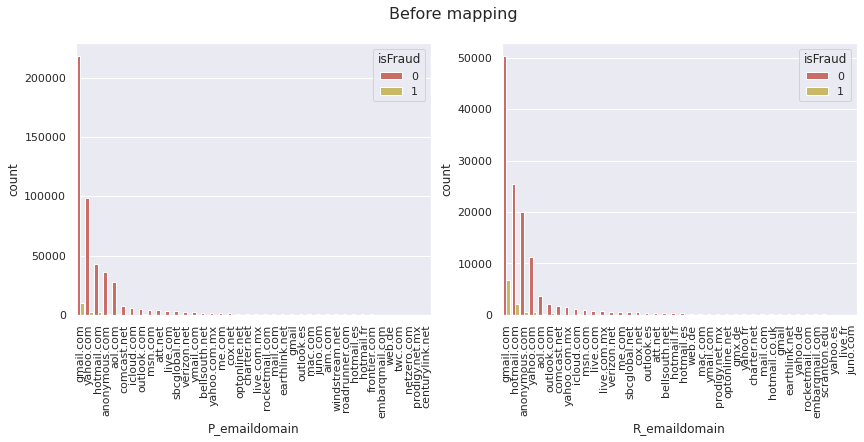

In [ ]:
# P_emaildomain and R_emaildomain before
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='P_emaildomain', data=old_df, hue='isFraud', order=pd.value_counts(old_df['P_emaildomain']).iloc[:40].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='R_emaildomain', data=old_df, hue='isFraud', order=pd.value_counts(old_df['R_emaildomain']).iloc[:40].index, palette=custom, ax=axes[1])
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("Before mapping", size=16)

Text(0.5, 0.98, 'Bin feature after mapping')

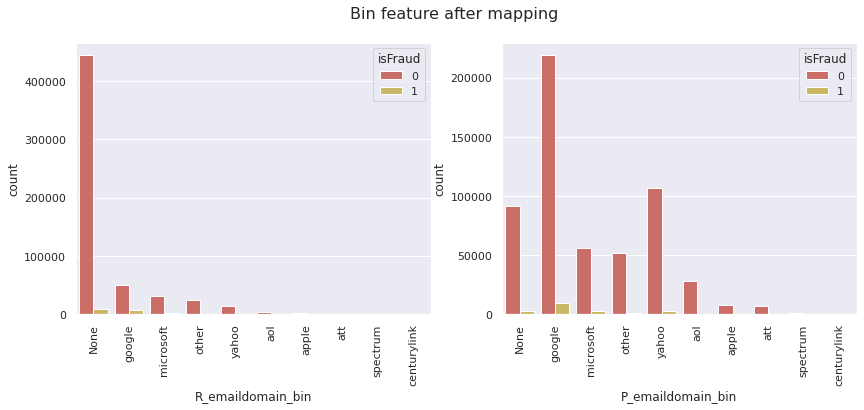

In [ ]:
# emaildomain bin after
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='R_emaildomain_bin', data=new_df, hue='isFraud', order=pd.value_counts(new_df['R_emaildomain_bin']).iloc[:40].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='P_emaildomain_bin', data=new_df, hue='isFraud', order=pd.value_counts(new_df['R_emaildomain_bin']).iloc[:40].index, palette=custom, ax=axes[1])
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("Bin feature after mapping", size=16)

Text(0.5, 0.98, 'Suffix feature after mapping')

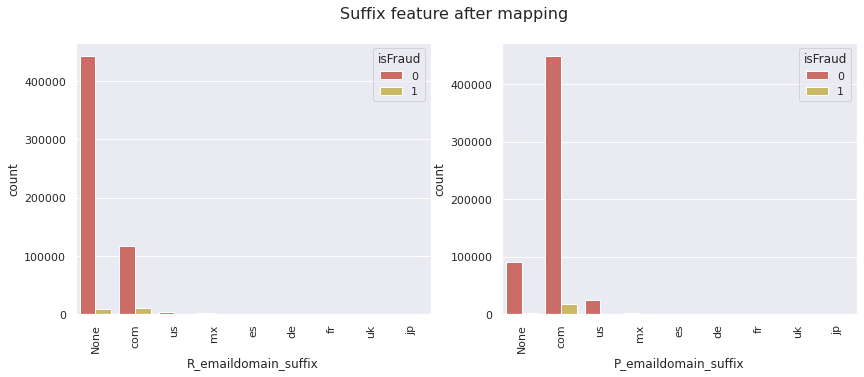

In [ ]:
# email suffix after
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='R_emaildomain_suffix', data=new_df, hue='isFraud', order=pd.value_counts(new_df['R_emaildomain_suffix']).iloc[:40].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='P_emaildomain_suffix', data=new_df, hue='isFraud', order=pd.value_counts(new_df['R_emaildomain_suffix']).iloc[:40].index, palette=custom, ax=axes[1])
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("Suffix feature after mapping", size=16)

Text(0.5, 0.98, 'Card6 before and after')

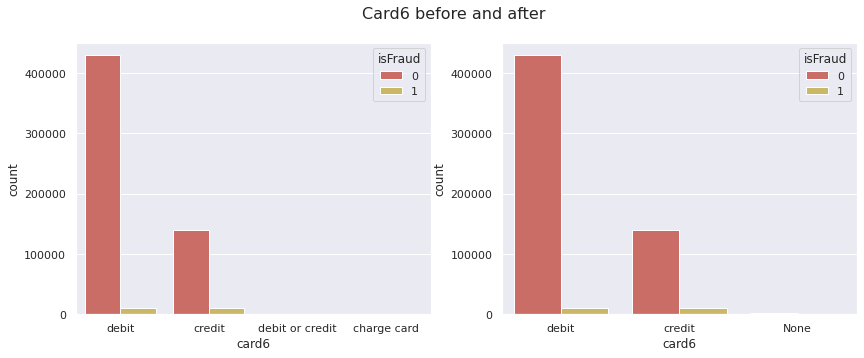

In [ ]:
# email suffix after
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='card6', data=old_df, hue='isFraud', order=pd.value_counts(old_df['card6']).iloc[:40].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='card6', data=new_df, hue='isFraud', order=pd.value_counts(new_df['card6']).iloc[:40].index, palette=custom, ax=axes[1])
#plt.setp(plot1.get_xticklabels(), rotation=90)
#plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("Card6 before and after", size=16)

Text(0.5, 0.98, 'dist1 and dist2 distribution')

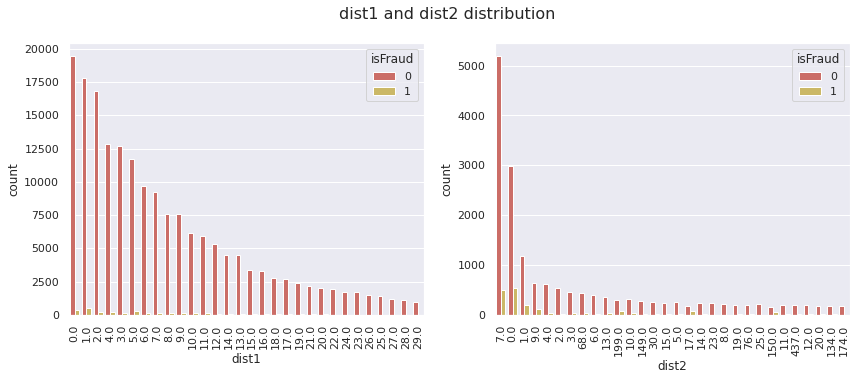

In [ ]:
# dist1 and dist 2 distribution plot
custom = sns.color_palette("hls", 8)

f, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.set(color_codes=True)
plot1 = sns.countplot(x='dist1', data=old_df, hue='isFraud', order=pd.value_counts(old_df['dist1']).iloc[:30].index, palette=custom, ax=axes[0])
plot2 = sns.countplot(x='dist2', data=old_df, hue='isFraud', order=pd.value_counts(old_df['dist2']).iloc[:30].index, palette=custom, ax=axes[1])
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plot1.legend(loc=1, title='isFraud')
plot2.legend(loc=1, title='isFraud')
plt.suptitle("dist1 and dist2 distribution", size=16)

Text(0, 0.5, 'Count')

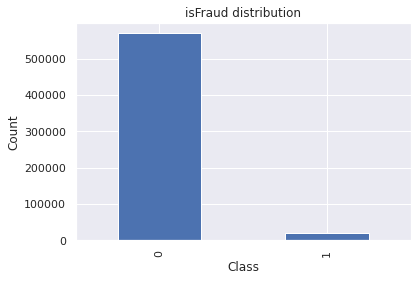

In [ ]:
# Unbalanced class plot
old_df["isFraud"].value_counts().plot(kind="bar")
plt.title('isFraud distribution')
plt.xlabel('Class')
plt.ylabel('Count')